In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('outsample.csv', header=0,  index_col=0)
series



FileNotFoundError: File b'outsample.csv' does not exist

In [5]:
X=series.values
X

array([[ 266. ],
       [ 145.9],
       [ 183.1],
       [ 119.3],
       [ 180.3],
       [ 168.5],
       [ 231.8],
       [ 224.5],
       [ 192.8],
       [ 122.9],
       [ 336.5],
       [ 185.9],
       [ 194.3],
       [ 149.5],
       [ 210.1],
       [ 273.3],
       [ 191.4],
       [ 287. ],
       [ 226. ],
       [ 303.6],
       [ 289.9],
       [ 421.6],
       [ 264.5],
       [ 342.3],
       [ 339.7],
       [ 440.4],
       [ 315.9],
       [ 439.3],
       [ 401.3],
       [ 437.4],
       [ 575.5],
       [ 407.6],
       [ 682. ],
       [ 475.3],
       [ 581.3],
       [ 646.9]])

In [4]:
size = int(len(X) * 0.80)


In [42]:
size

28

predicted=356.082032, expected=401.300000
predicted=446.379499, expected=437.400000
predicted=394.737297, expected=575.500000
predicted=434.915467, expected=407.600000
predicted=507.923400, expected=682.000000
predicted=435.482971, expected=475.300000
predicted=652.743749, expected=581.300000
predicted=546.343491, expected=646.900000
Test MSE: 10331.308


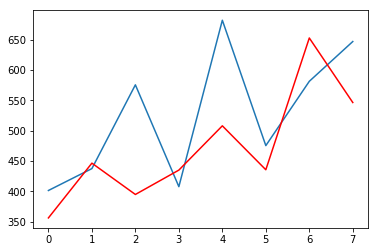

In [52]:
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

# print(history)

predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
